##Projeto Aprendizado de Máquina -

- Conjunto de dados:
Utilizar apenas o conjunto treino (train.csv) e realizar a separação entre treino (com 70%) e
teste (30%);
- Classificadores: Poderá ser utilizado outros classificadores, além daqueles abordados em
sala de aula (Decision Tree, Randon Forest, KNN e SVM).

- Limpeza e pré-processamento dos dados(Remoção de dados faltantes NaN, transformação de dados categóricos e normalização);
- Avaliação com pelo menos 3 classificadores;
- Ajuste dos hiperparâmetros com GridSearchCV e RandonSearchCV;
- Amostragem por validação cruzada estratificada (10 folds);
- Apresentação da Acurácia nos conjuntos treino (10 folds) e também conjunto teste;
- Apresentação da Matriz confusão;
- Redução da base de dados com seleção de características RFE;

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import statistics as sts
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df['Transported'].value_counts()
df.info()

True     4378
False    4315
Name: Transported, dtype: int64

###**Limpeza e pré-processamento dos dados**

In [ ]:
# Como foi notado que a coluna Cabin tinha 3 informações contidas então foi necessário realizar a separação dessas informações em novas colunas a fim de facilitar o pré-processamento
df['Cabin_Side'] = df['Cabin'].str.split("/").str[2]
df['Cabin_Num'] = df['Cabin'].str.split("/").str[1]
df['Cabin_Deck'] = df['Cabin'].str.split("/").str[0]
df = df.drop('Cabin',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Cabin_Side    8494 non-null   object 
 14  Cabin_Num     8494 non-null   object 
 15  Cabin_Deck    8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n",df.nunique())

Linhas:  8693
Colunas:  16

Atributos : 
 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Cabin_Side', 'Cabin_Num', 'Cabin_Deck']

Valores faltantes :   2722

Valores únicos :  
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
Cabin_Side         2
Cabin_Num       1817
Cabin_Deck         8
dtype: int64


In [ ]:
df[df.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Side,Cabin_Num,Cabin_Deck
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,S,0,G
10,0008_02,Europa,True,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,P,1,B
15,0012_01,Earth,False,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,NaN,NaN,NaN
16,0014_01,Mars,False,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,P,3,F
23,0020_03,Earth,True,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,S,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True,P,597,E
8674,9257_01,NaN,False,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,P,1892,F
8675,9259_01,Earth,NaN,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,P,1893,F
8684,9274_01,NaN,True,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,P,1508,G


In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

df['HomePlanet'] = imputer.fit_transform(df['HomePlanet'].values.reshape(-1,1))[:,0]
df['CryoSleep'] = imputer.fit_transform(df['CryoSleep'].values.reshape(-1,1))[:,0]
df['Destination'] = imputer.fit_transform(df['Destination'].values.reshape(-1,1))[:,0]
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
df['VIP'] = imputer.fit_transform(df['VIP'].values.reshape(-1,1))[:,0]
df['RoomService'] = imputer.fit_transform(df['RoomService'].values.reshape(-1,1))[:,0]
df['FoodCourt'] = imputer.fit_transform(df['FoodCourt'].values.reshape(-1,1))[:,0]
df['ShoppingMall'] = imputer.fit_transform(df['ShoppingMall'].values.reshape(-1,1))[:,0]
df['Spa'] = imputer.fit_transform(df['Spa'].values.reshape(-1,1))[:,0]
df['VRDeck'] = imputer.fit_transform(df['VRDeck'].values.reshape(-1,1))[:,0]
df['Cabin_Side'] = imputer.fit_transform(df['Cabin_Side'].values.reshape(-1,1))[:,0]
df['Cabin_Num'] = imputer.fit_transform(df['Cabin_Num'].values.reshape(-1,1))[:,0]
df['Cabin_Deck'] = imputer.fit_transform(df['Cabin_Deck'].values.reshape(-1,1))[:,0]

In [ ]:
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())


Valores faltantes :   200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Cabin_Side    8693 non-null   object 
 14  Cabin_Num     8693 non-null   object 
 15  Cabin_Deck    8693 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
print ("\nValores únicos :  \n",df.nunique())


Valores únicos :  
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
Cabin_Side         2
Cabin_Num       1817
Cabin_Deck         8
dtype: int64


In [ ]:
df=df.drop(columns=['PassengerId', 'Name'],axis=1)

In [ ]:
#Transformando atributos com dois valores
labelencoder = LabelEncoder()
df[["CryoSleep", "VIP", "Transported", "Cabin_Side"]] = \
df[["CryoSleep", "VIP", "Transported", "Cabin_Side"]].apply(labelencoder.fit_transform)

In [ ]:
#Transformando atributos com mais de dois valores
df = pd.get_dummies(data=df, columns=["Destination", "HomePlanet", "Cabin_Deck"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Cabin_Side                 8693 non-null   int64  
 10  Cabin_Num                  8693 non-null   object 
 11  Destination_55 Cancri e    8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   uint8

In [ ]:
df['Cabin_Num'] = df['Cabin_Num'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Cabin_Side                 8693 non-null   int64  
 10  Cabin_Num                  8693 non-null   int64  
 11  Destination_55 Cancri e    8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   uint8

In [ ]:
print ("\nValores únicos :  \n",df.nunique())


Valores únicos :  
 CryoSleep                       2
Age                            80
VIP                             2
RoomService                  1273
FoodCourt                    1507
ShoppingMall                 1115
Spa                          1327
VRDeck                       1306
Transported                     2
Cabin_Side                      2
Cabin_Num                    1817
Destination_55 Cancri e         2
Destination_PSO J318.5-22       2
Destination_TRAPPIST-1e         2
HomePlanet_Earth                2
HomePlanet_Europa               2
HomePlanet_Mars                 2
Cabin_Deck_A                    2
Cabin_Deck_B                    2
Cabin_Deck_C                    2
Cabin_Deck_D                    2
Cabin_Deck_E                    2
Cabin_Deck_F                    2
Cabin_Deck_G                    2
Cabin_Deck_T                    2
dtype: int64


In [ ]:
std=StandardScaler()
columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']
scaled = std.fit_transform(df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df.head()

,CryoSleep,VIP,Transported,Cabin_Side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0.715553,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.149753
1,0,0,1,1,0,0,1,1,0,0,...,1,0,0,-0.329408,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-1.149753
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,2.039169,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.149753
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0.297569,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.149753
4,0,0,1,1,0,0,1,1,0,0,...,1,0,0,-0.886720,0.125652,-0.237159,-0.031059,0.231374,-0.261240,-1.147800


###**Avaliação com pelo menos 3 classificadores**

In [ ]:
X = df.drop(['Transported'], axis=1).values
y = df['Transported'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Random Forest**

In [ ]:
#forest = RandomForestClassifier(random_state=42, n_estimators = 100)
forest = RandomForestClassifier(random_state=42)
#==
forest.fit(X_train, y_train)
#==
#Score
#==
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.9990139687756779
Testing Score 
 0.7914110429447853
[[1056  232]
 [ 312 1008]]




```
Ajuste de Hiperparâmetros - GridSearchCV
```



In [ ]:
forest = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 300]}

In [ ]:
g_search = GridSearchCV(estimator = forest, param_grid = param_grid,
                        cv = 10, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train)
print(g_search.best_params_)

In [ ]:
forest = RandomForestClassifier(random_state=42, max_features='sqrt',
                                n_estimators= 70, criterion='entropy')

forest.fit(X_train, y_train)
#==
#Score
#==
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.9990139687756779
Testing Score 
 0.7963957055214724
[[1067  221]
 [ 310 1010]]


In [ ]:
print(g_search.best_score_)

0.8024646746175785




```
Ajuste de Hiperparâmetros - RandomizedSearchCV
```



In [ ]:
forest = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 40, 50, 100, 200]}

In [ ]:
r_search = RandomizedSearchCV(estimator = forest, param_distributions = param_grid,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
r_search.fit(X_train, y_train);
print(r_search.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

{'n_estimators': 40, 'max_features': 'log2', 'criterion': 'gini'}


In [ ]:
forest = RandomForestClassifier(random_state=42, max_features='log2',
                                n_estimators= 40, criterion='gini')

forest.fit(X_train, y_train)
#==
#Score
#==
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.9983566146261298
Testing Score 
 0.7894938650306749
[[1062  226]
 [ 323  997]]


In [ ]:
print(r_search.best_score_)

0.8003267867945727




```
Amostragem por validação cruzada estratificada (10 folds)
```



In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_train = []
lst_accu_stratified_test = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    forest.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_train.append(forest.score(x_train_fold, y_train_fold))
    lst_accu_stratified_test.append(forest.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC train:', lst_accu_stratified_train)
print('Lista de ACC test:', lst_accu_stratified_test)

print('\nMaior ACC train:',
      max(lst_accu_stratified_train)*100, '%')

print('\nMaior ACC test:',
      max(lst_accu_stratified_test)*100, '%')


Lista de ACC train: [0.9989773744087945, 0.9982104052153905, 0.9980825770164898, 0.9985940695296524, 0.998721881390593, 0.9985940695296524, 0.9976993865030674, 0.9984662576687117, 0.9982106339468303, 0.998721881390593]
Lista de ACC test: [0.7885057471264367, 0.8057471264367816, 0.8103448275862069, 0.7986191024165707, 0.7733026467203682, 0.8158803222094362, 0.7997698504027618, 0.8055235903337169, 0.7882623705408516, 0.7917146144994246]

Maior ACC train: 99.89773744087945 %

Maior ACC test: 81.58803222094362 %




```
Apresentação da Matriz confusão
```



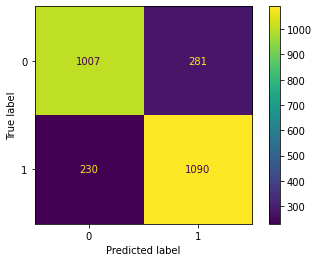

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()



```
Redução da base de dados com seleção de características RFE
```



In [ ]:
selector = RFE(forest, step=1)
selector = selector.fit(X, y)

#Armazena a nova dimensão do vetor de características
features = selector.fit_transform(X,y)

# instancia um DecisionTreeClassifier
y_pred = selector.predict(X_test)

print(selector.ranking_)
print(selector.get_support(indices=True))

 # gerar score baseado na acurácia
acc = round(accuracy_score(y_test,y_pred)*100,2)
print(acc)

[ 1 11  1  5  9  2  1  1  6 12  7  8 10  3  1  4 13  1  1  1  1  1  1  1]
[ 0  2  6  7 14 17 18 19 20 21 22 23]
99.88


In [ ]:
cols = pd.Series(selector.support_,index = df.drop(columns='Transported', axis=1).columns)
wrapper = cols[cols==True].index
print(wrapper)

Index(['CryoSleep', 'Cabin_Side', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'Cabin_Deck_F', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin_Num'],
      dtype='object')


In [ ]:
# Deixa no formato list
featuresList = wrapper.tolist()

In [ ]:
dfTeste = df[featuresList]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfTeste, y, test_size=0.3)


In [ ]:
#forest = RandomForestClassifier(random_state=42, n_estimators = 100)
forest = RandomForestClassifier(random_state=42)
#==
forest.fit(X_train, y_train)
#==
#Score
#==
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.9988496302382909
Testing Score 
 0.7802914110429447
[[1044  232]
 [ 341  991]]


**SVM**

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
#==
#Score
#==
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#==
#testing model
#==
y_pred = svc.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.810024650780608
Testing Score 
 0.7986963190184049
[[ 998  278]
 [ 247 1085]]



```
Ajuste de Hiperparâmetros - GridSearchCV
```

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[1, 5, 10], 'gamma':['scale','auto']}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
GridSearchCV(estimator=SVC(), param_grid=parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svc = SVC(C=5, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
#==
#Score
#==
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#==
#testing model
#==
y_pred = svc.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.8113393590797042
Testing Score 
 0.7960122699386503
[[1001  275]
 [ 257 1075]]


In [ ]:
print(clf.best_score_)

0.8044371405094495



```
Ajuste de Hiperparâmetros - RandomizedSearchCV
```

In [ ]:
svc = SVC()
from sklearn.model_selection import RandomizedSearchCV
r_search = RandomizedSearchCV(estimator = svc, param_distributions = parameters,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
r_search.fit(X_train, y_train);
print(r_search.best_params_)

{'kernel': 'rbf', 'gamma': 'auto', 'C': 5}


In [ ]:
svc = SVC(C=5, kernel='rbf', gamma='scale')
svc.fit(X_train, y_train)
#==
#Score
#==
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#==
#testing model
#==
y_pred = svc.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.8152834839769926
Testing Score 
 0.7952453987730062
[[1006  270]
 [ 264 1068]]


In [ ]:
print(r_search.best_score_)

0.8019774652147611


Amostragem por validação cruzada estratificada (10 folds)

In [ ]:
# Create StratifiedKFold object.

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_train = []
lst_accu_stratified_test = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    svc.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_train.append(svc.score(x_train_fold, y_train_fold))
    lst_accu_stratified_test.append(svc.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC train:', lst_accu_stratified_train)
print('Lista de ACC test:', lst_accu_stratified_test)

print('\nMaior ACC train:',
      max(lst_accu_stratified_train)*100, '%')

print('\nMaior ACC test:',
      max(lst_accu_stratified_test)*100, '%')


Lista de ACC train: [0.8258979930972773, 0.8270484468873833, 0.8244918829093698, 0.8264314928425358, 0.8284764826175869, 0.8241308793456033, 0.8263036809815951, 0.8278374233128835, 0.8278374233128835, 0.8280930470347648]
Lista de ACC test: [0.8114942528735632, 0.8218390804597702, 0.8218390804597702, 0.80897583429229, 0.7882623705408516, 0.8308400460299195, 0.812428078250863, 0.7997698504027618, 0.7917146144994246, 0.7917146144994246]

Maior ACC train: 82.84764826175869 %

Maior ACC test: 83.08400460299194 %


Apresentação da Matriz confusão

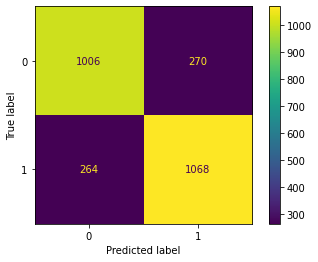

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(cm)

Acurácia:  0.7745398773006135
[[ 993  283]
 [ 305 1027]]


Ajuste de Hiperparâmetros - GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,11,19],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['cityblock',  'cosine', 'euclidean', 'haversine', 'l1',  'l2', 'manhattan'],
              }

In [ ]:
g_search = GridSearchCV(estimator = knn, param_grid = param_grid,
                        cv = 10, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train)

In [ ]:
print(g_search.best_params_)

{'algorithm': 'ball_tree', 'metric': 'cityblock', 'n_neighbors': 19, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19, weights='uniform', algorithm='ball_tree', metric='cityblock')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(cm)

Acurácia:  0.7833588957055214
[[1007  269]
 [ 296 1036]]


In [ ]:
print(g_search.best_score_)

0.7972015167228417


Ajuste de Hiperparâmetros - RandomizedSearchCV

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,11,19],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['cityblock',  'cosine', 'euclidean', 'haversine', 'l1',  'l2', 'manhattan'],
              }

In [ ]:
r_search = RandomizedSearchCV(estimator = knn, param_distributions = param_grid,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
r_search.fit(X_train, y_train)

In [ ]:
print(r_search.best_params_)

{'weights': 'uniform', 'n_neighbors': 11, 'metric': 'l1', 'algorithm': 'kd_tree'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='kd_tree', metric='l1')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(cm)

Acurácia:  0.7779907975460123
[[ 991  285]
 [ 294 1038]]


In [ ]:
print(g_search.best_score_)

0.7972015167228417


Amostragem por validação cruzada estratificada (10 folds)

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_train = []
lst_accu_stratified_test = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    knn.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_train.append(knn.score(x_train_fold, y_train_fold))
    lst_accu_stratified_test.append(knn.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC train:', lst_accu_stratified_train)
print('Lista de ACC test:', lst_accu_stratified_test)

print('\nMaior ACC train:',
      max(lst_accu_stratified_train)*100, '%')

print('\nMaior ACC test:',
      max(lst_accu_stratified_test)*100, '%')


Lista de ACC train: [0.8279432442796881, 0.829605010865397, 0.826792790489582, 0.8300102249488752, 0.8255368098159509, 0.8271983640081799, 0.8289877300613497, 0.825920245398773, 0.8275817995910021, 0.8273261758691206]
Lista de ACC test: [0.7919540229885057, 0.7977011494252874, 0.7977011494252874, 0.7744533947065593, 0.7848101265822784, 0.8204833141542003, 0.7974683544303798, 0.7871116225546605, 0.761795166858458, 0.7698504027617952]

Maior ACC train: 83.00102249488752 %

Maior ACC test: 82.04833141542002 %


Apresentação da Matriz confusão

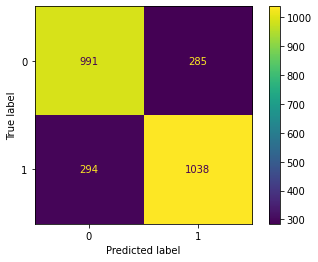

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Redução da base de dados com seleção de características RFE

In [ ]:
selector = RFE(knn, step=1)
selector = selector.fit(X, y)

#Armazena a nova dimensão do vetor de características
features = selector.fit_transform(X,y)

# instancia um DecisionTreeClassifier
y_pred = selector.predict(X_test)

print(selector.ranking_)
print(selector.get_support(indices=True))

 # gerar score baseado na acurácia
acc = round(accuracy_score(y_test,y_pred)*100,2)
print(acc)

In [ ]:
cols = pd.Series(selector.support_,index = df.drop(columns='Transported', axis=1).columns)
wrapper = cols[cols==True].index
print(wrapper)

In [ ]:
# Deixa no formato list
featuresList = wrapper.tolist()

In [ ]:
dfTeste = df[featuresList]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfTeste, y, test_size=0.3)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print(cm)